# Lineaarinen regressio: materiaali

Tällä kertaa tutustumme lineaariseen regressioon. Lineaarinen regressio on hyvä malli silloin, kun halutaan tutkia joidenkin tekijöiden vaikutusta jatkuvaan muuttujaan: esimerkiksi tänään pohdimme palkkoja ja myyntiä. Se on hyvä yleismalli, jota on syytä kokeilla aina ensin vastaavissa tapauksissa. Sen ennustevoima on monesti aika rajallinen, mutta analysoimalla lineaarista regressiomallia ja visualisoimalla dataa sen tueksi saadaan tärkeää tietoa siitä, mitä tehdä seuraavaksi, jos yksinkertainen malli ei riitä.

Jotta elämä ei kävisi liian tylsäksi, tutustumme myös pariin uuteen data scientistin työkaluun. Lisäämme lineaariseen regressioon sääntelytermin (*engl. regulation*). Sitten katselemme ristiinvalidointia ja lopuksi vilkaisemme lyhyesti muuttujien standardisoimista. Nämä menetelmät soveltuvat myös logistisen regression tapauksessa ja kiinnostuneille suosittelemmekin vahvasti toistamaan analyysin käyttämällä viime kerran materiaaleja.

Tänään pääset siis jälleen pohtimaan erilaisia data science -tehtäviä. Ensimmäisessä tehtävässä toimit headhunterina, joka välittää yritysjohtajia ja yrittää arvioida näiden palkkaa käyttämällä avukseen data science -menetelmiä. Toisessa tehtävässä olet töissä ison yrityksen markkinointiosastolla ja tehtävänäsi on ennustaa markkinoinnin vaikutusta myyntiin. Edellisen kerran tapaan esimerkeissä käytetyt datasetit ovat aitoja, mutta niiden ympärille rakennetut tarinat keksittyjä. 

Käymme jälleen ensin mallia läpi yhdessä ensimmäisen tehtävän avulla. Toinen tehtävä jätetään harjoitustyöksi. Aluksi jutellaan myös hetki teoriasta.

# Ensimmäinen tehtävä: yritysjohtajan palkan ennustaminen

Olet siis töissä headhunter-yrityksessä ja tehtävänäsi on etsiä yrityksille johtajia. Saat työstäsi palkkion jokaisen onnistuneen rekrytoinnin johdosta. Saamasi palkkio riippuu johtajan palkasta uudessa työpaikassa. Haaveilet siis nappailevasi mahdollisimman kovapalkkaisia johtajia.

Internetistä lukemasi perusteella arvelet, että voisit käyttää johtajien palkan ennustamiseen koneoppimisen menetelmiä. Pienellä vaivalla saat käsiisi datasetin, josta on kuvaus alla

Obs:   177

1. salary                   1990 compensation, $1000s
2. age                      in years
3. college                  = 1 if attended college
4. grad                     = 1 if attended graduate school
5. comten                   years with company
6. ceoten                   years as ceo with company
7. sales                    1990 firm sales, millions
8. profits                  1990 profits, millions
9. mktval                   market value, end 1990, mills.
10. lsalary                  log(salary)
11. lsales                   log(sales)
12. lmktval                  log(mktval)
13. comtensq                 comten^2
14. ceotensq                 ceoten^2
15. profmarg                 profits as % of sales

## Lyhyt katsaus teoriaan

Lineaarinen regressio siis arvio yritysjohtajan palkkaa erilaisten tekijöiden, kuten yrityksen myynnin tai markkina-arvon funktiona. Matemaattisesti kuvattuna
\begin{equation}
y = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n .  \tag{1}
\end{equation}
Yhtälössä (1) $ y $ on selitettävä eli endogeeninen muuttuja, tässä yritysjohtajan palkka. $ x_1, ..., x_n $ ovat endogeenisia eli selittäviä muuttujia ja niiden arvot saadaan datasta. Regressiokertoimet $ \beta_0, ..., \beta_n $ estimoidaan mallin avulla. 

Lineaarisen regression tapauksessa regressiokertoimilla on selkeä tulkinta. $ \beta_0 $ on vakiotermi, joka kertoo yrityksen johtajan palkan silloin, kun kaikki selittävät tekijät saavat arvon 0. Esimerkiksi tehtäväosuudessa se kuvaa myynnin määrää silloin, kun yritys ei käytä rahaa mainontaan. $ \beta_1, ..., \beta_n $ kertovat kunkin selittävän muuttujan vaikutuksen palkkaan, esimerkiksi kuinka paljon enemmän tai vähemmän palkkaa vanhempi yritysjohtaja saa nuorempaan verrattuna.

Regression selitysvoimaa voi usein parantaa lisäämällä erilaisia muunnoksia selittävistä tekijöistä, kuten logaritmeja tai polynomeja. Käytämme luento-osuudessa muuttujista myös seuraavanlaisia muotoja
\begin{equation}
\log y = \beta_0 + \beta_1 \log x_1 + \beta_2 x_2^2 + ... + \beta_n x_n .  \tag{2}
\end{equation}
Kutsutaan muuttujaa tasomuuttujaksi, jos se on on muotoa $ x_i $ ja log-muuttujaksi, jos se on muotoa $ \log x_i $. Logaritmisilla termeillä kuvataan prosenttimuutoksia.

Logaritmisten ja tasomuuttujien kertoimilla voidaan esittää selkeä tulkinta, jota voidaan havainnollistaa seuraavan taulukon avulla

| Malli  | Engoneeninen muuttuja | Eksogeeninen muuttuja   | Kertoimen $ \beta_1 $ tulkinta |
| ------------- | ------------- | ------------- | ------------- | 
| taso - taso  | $ y $  | $ x $ | $ \Delta y = \beta_1 \Delta x $  |
| taso - log  | $ y $  | $ \log x $  | $ \Delta y = (\beta_1/100)\% \Delta x $  |
| log - taso  | $ \log y $  | $ x $ | $ \% \Delta y = (100\beta_1) \Delta x $  |
| log - log  | $ \log y $  | $ \log x $  | $ \% \Delta y = \beta_1\% \Delta x $  |

Lisäksi käsittelemme regression sääntelyä. Rajoitamme tarkastelun kahteen tapaukseen: lassoon (*engl. least absolute shrinkage and selection operator*) ja harjanneregressioon (*engl. ridge*). Tarkastelemme ääritapauksia havainnollisuuden vuoksi; käytännössä usein käytetään yhdistelmiä ja muitankin menetelmiä on. Sääntelyn tarkoituksena on suojella mallia ylisovittamiselta ja sääntelymallit rankaisevat mallia monimutkaisuudesta. Tarkemmin lasso rankaisee mallia muuttujien määrästä ja harjanne koosta. Lasso siis yksinkertaistaa mallia vähentämällä selittävien tekijöiden määrää ja harjanne yrittää estää vaikkapa tilannetta, jossa yksi muuttuja dominoisi analyysia.

## Data

Aloitamme jälleen tehtävän datantarkastelulla. Käytetään Pandas-kirjastoa ja tulostetaan muistikirjaan datasetin ensimmäiset rivit ja muoto.

In [1]:
import pandas as pd

In [2]:
# data avattu suomenkielisessä excelissä, joten desimaalit on eroteltu pilkulla ja solut puolipisteellä
# jos datasettisi on samassa kansiossa, poista alta '../data/'
df = pd.read_csv('../data/ceosal2.csv', sep = ';', decimal = ',')

In [3]:
df.tail()

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
172,264,63,1,0,42,3,334,43,480,5.575949,5.811141,6.173786,1764,9,12.874250
173,185,58,1,0,39,1,766,49,560,5.220356,6.641182,6.327937,1521,1,6.396867
174,387,71,1,1,32,13,432,28,477,5.958425,6.068426,6.167517,1024,169,6.481482
175,2220,63,1,1,18,18,277,-80,540,7.705263,5.624018,6.291569,324,324,-28.880870
176,445,69,1,0,23,0,249,31,828,6.098074,5.517453,6.719013,529,0,12.449800


In [4]:
df.shape

(177, 15)

Muistat lukeneesi, että analyysi kannattaa aina aloittaa piirtämällä muuttujista kuvia. Googlen avulla löydät nk. laatikko ja viikset -kuvion (*engl. boxplot/ box-and-whisker plot*), joka näyttäisi visualisoivan hyvin jatkuvan muuttujan jakaumaa. Päätät piirtää sellaisen

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

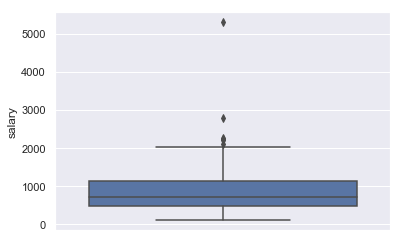

In [6]:
sns.boxplot(data = df, y = 'salary')

Huomaat, että aineistossasi on johtaja, jolla on muihin nähden poikkeuksellisen korkea palkka. Päätät jäädä tutkistelemaan tilannetta.

Kokeneena rekrytoijana huomiosi kiinnittyy myös muuttujaan 'college', joka tuntuu saavan arvon 1 jokaiselle datasetissä esiintyvälle johtajalle. Näppituntumasi sanoo, että suurin osa kohtaamistasi yritysjohtajista on suorittanut collegen. Muistelet kuulleesi, että regressiossa ei ole hyvä olla muuttujia, joista on vain hyvin vähän havaintoja jossakin kategoriassa. Päätät ottaa kyseisestä muuttujasta tarkemmin selvää. Aloitat piirtämällä kuvan.

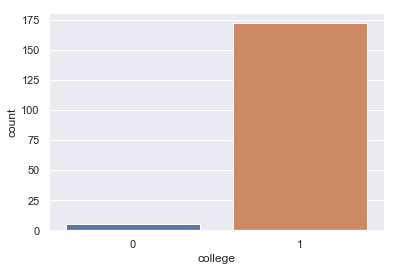

In [7]:
sns.countplot(x = 'college', data = df)
plt.show()

Huomaat, että aineistossasi on todella vähän johtajia, jotka eivät ole käyneet collegea. Varmuuden vuoksi päätät tulostaa taulukon, joka kertoo, kuinka monta.

In [8]:
taulukko = pd.crosstab(index = df['college'], columns = 'count')

# nimetään taulukon osat niin, että lopputulos on hyvin ymmärrettävissä
taulukko.columns = ['lukumäärä']
taulukko.index = ['ei collegea', 'college']

# tulostetaan vielä valmis taulukko
taulukko

,lukumäärä
ei collegea,5
college,172


Muistelet joskus kuulleesi nyrkkisäännön, jonka mukaan muuttujaa ei saa ottaa mukaan analyysiin, jos sillä ei ole vähintään viittä arvoa kategoriassa. Olet hieman epäileväinen ja päätät toistaa aiemman laatikkokuvasi, mutta tällä kertaa piirtää erillisen laatikon collegen suorittamisen mukaan.

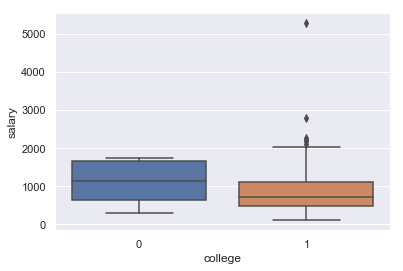

In [9]:
sns.boxplot(data = df, x = 'college', y = 'salary')
plt.show()

Huomaat, että jakauma on melko epätasainen; collegen käymättömillä on huomattavasti suurempi palkka. Pelkäät, että tämä muuttuja vääristää analyysiasi, joten päätät poistaa muuttujan aineistostasi.

In [10]:
df = df.drop(['college'], axis = 1)

Seuraavaksi huomaat, että aineistossasi on sekä taso- että log-muuttujia. Tulostat tiedot muuttujista muistisi virkistämiseksi.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
salary      177 non-null int64
age         177 non-null int64
grad        177 non-null int64
comten      177 non-null int64
ceoten      177 non-null int64
sales       177 non-null int64
profits     177 non-null int64
mktval      177 non-null int64
lsalary     177 non-null float64
lsales      177 non-null float64
lmktval     177 non-null float64
comtensq    177 non-null int64
ceotensq    177 non-null int64
profmarg    177 non-null float64
dtypes: float64(4), int64(10)
memory usage: 19.4 KB


Päätät jakaa aineistosi kahteen osaan: toiseen keräät tasomuuttujia ja toiseen log-muuttujia. Analyysisi aiot suorittaa varmuuden vuoksi molemmilla.

In [12]:
df_taso = df.drop(['lsalary', 'lsales', 'lmktval'], axis = 1)
df_log = df.drop(['salary', 'sales', 'mktval'], axis = 1)

Aineistossasi on melko melko monta muuttujaa ja haluat saada niistä tarkemman kuvat. Havainnollistamiseksi aloitat piirtämällä parittaiset kuvat. 

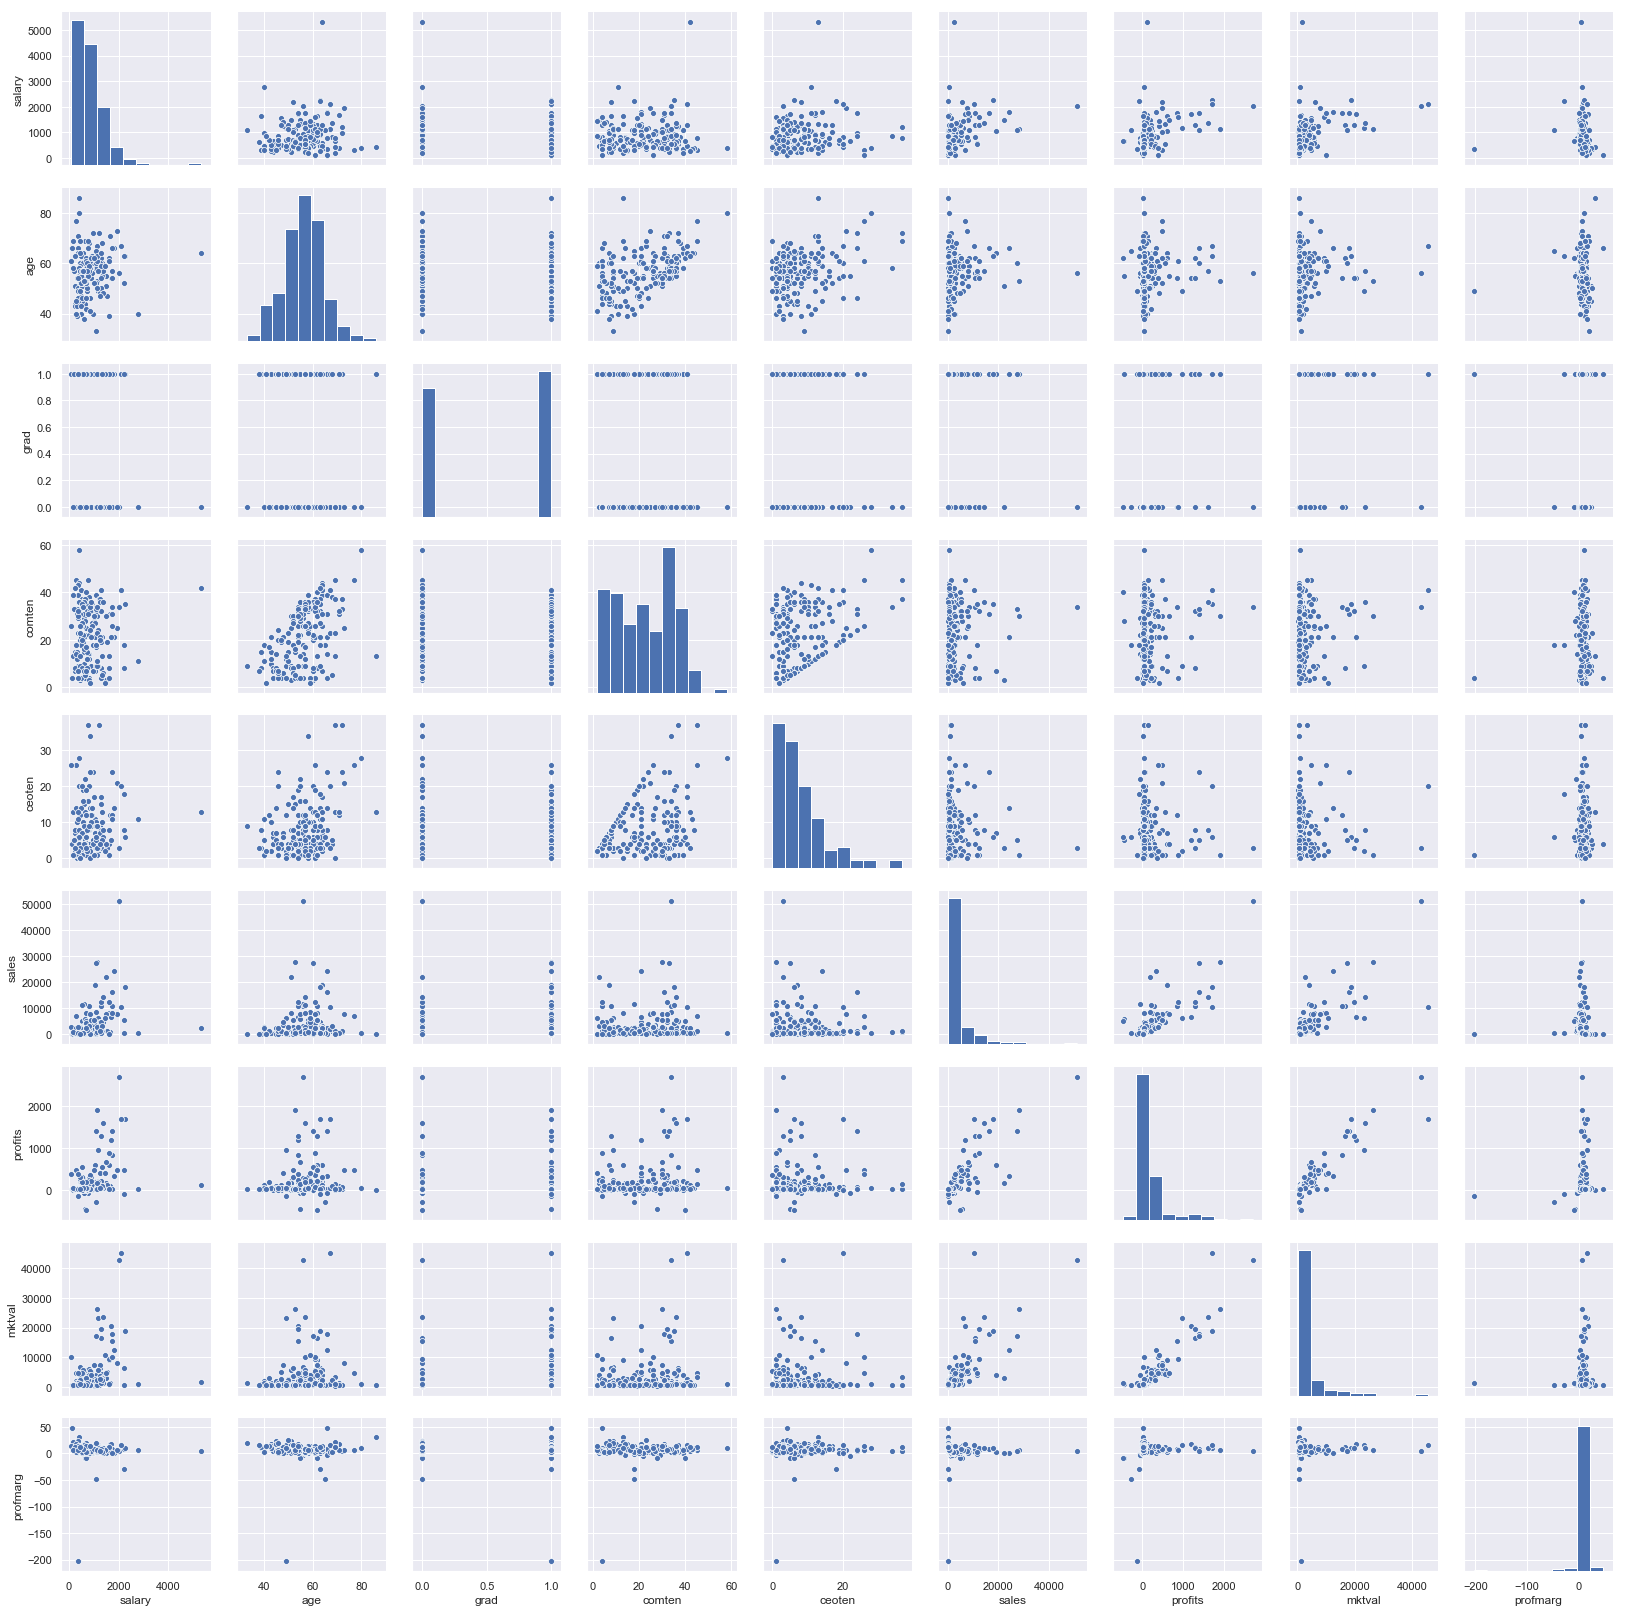

In [13]:
# jätetään neliömuotoiset muuttujat pois
sns.pairplot(df_taso.drop(['comtensq', 'ceotensq'], axis = 1))
plt.show()

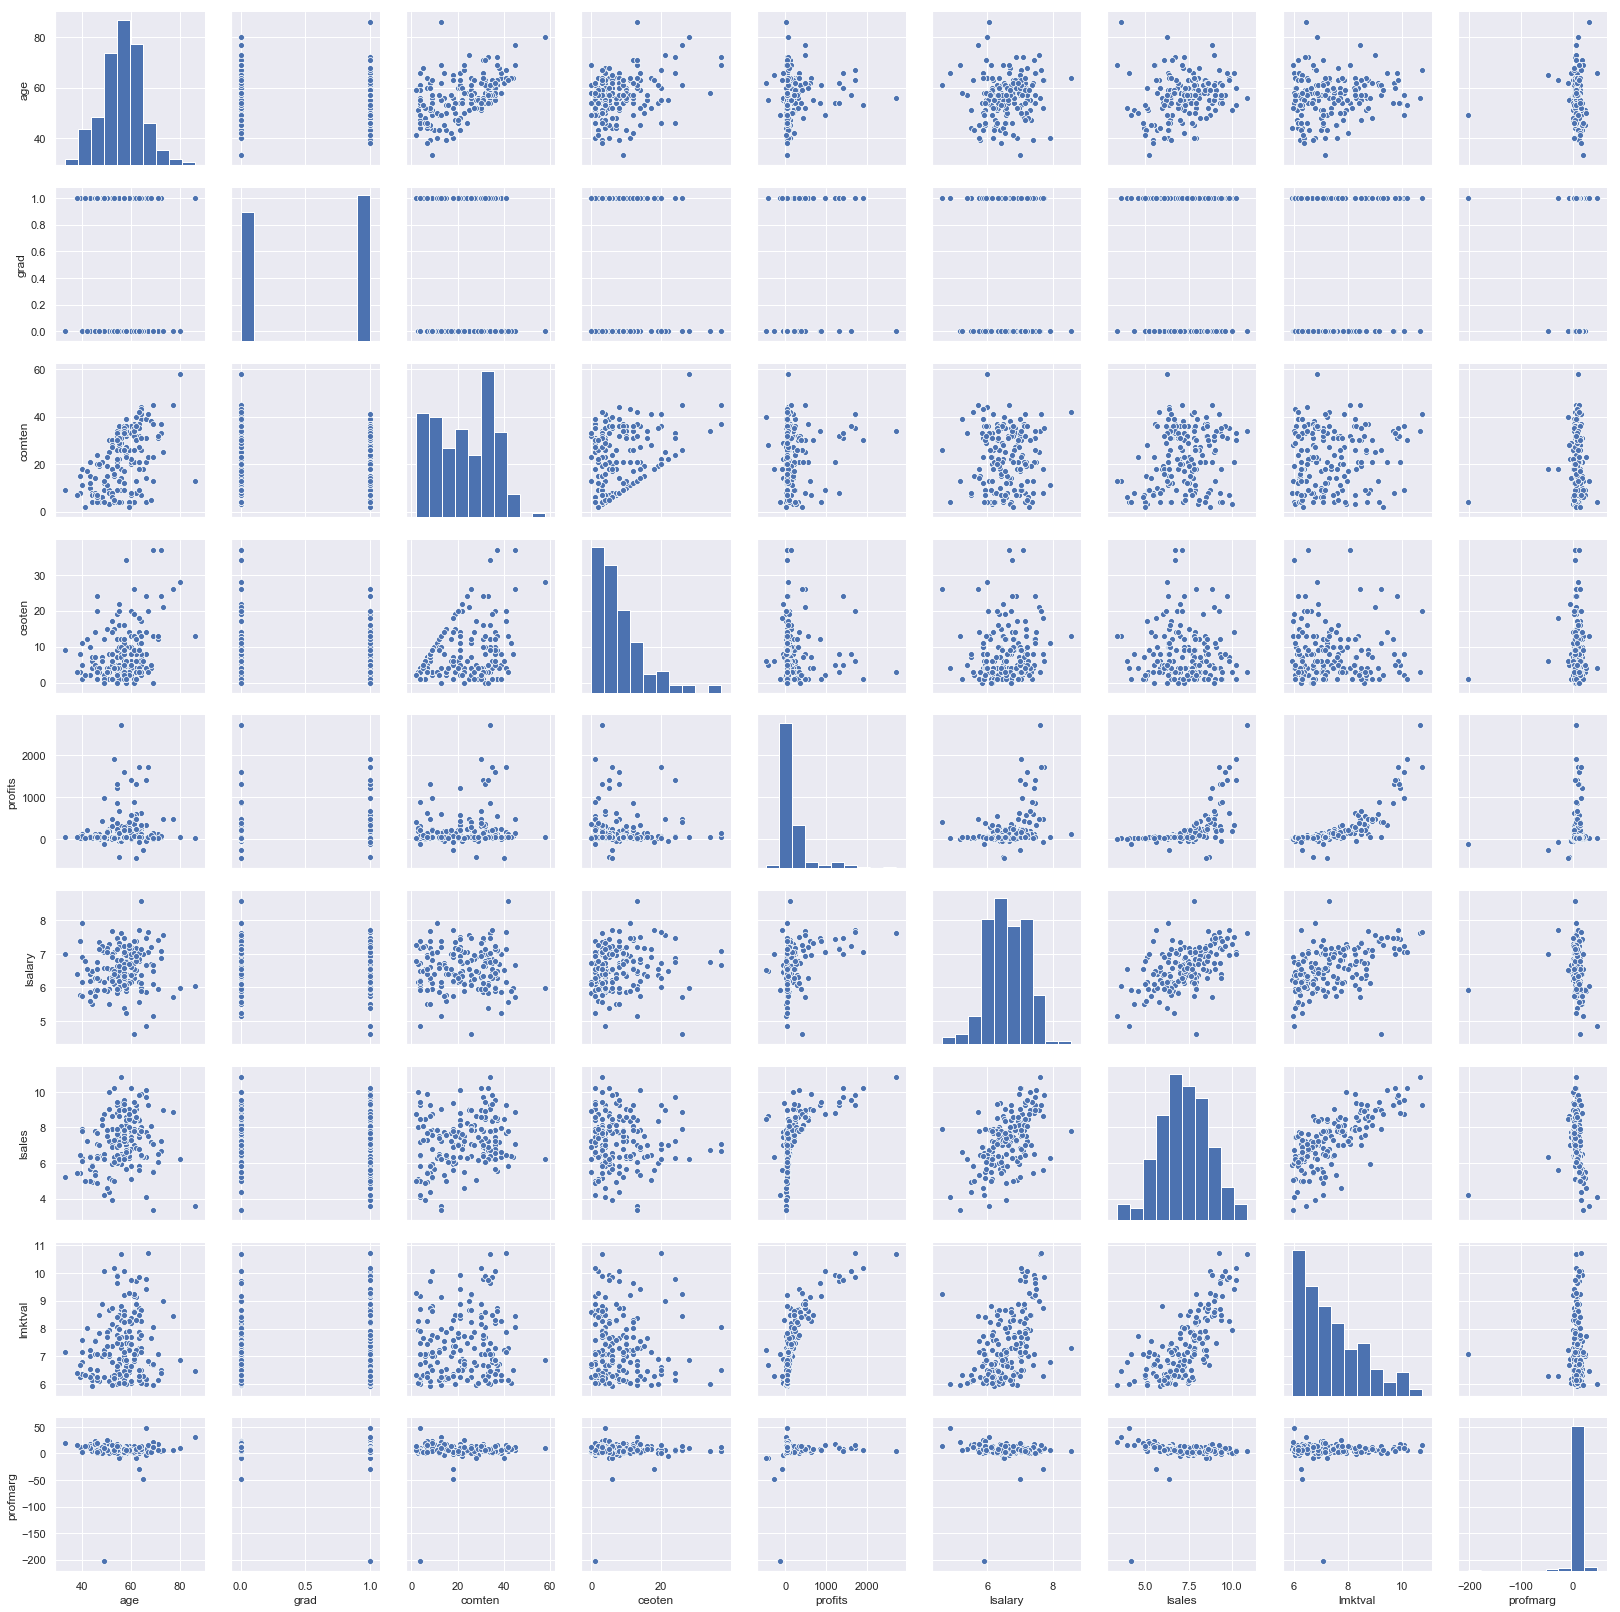

In [14]:
sns.pairplot(df_log.drop(['comtensq', 'ceotensq'], axis = 1))
plt.show()

Hieman huolestuneena tarkastelet havaintoasi, jolla on poikkeuksellisen korkea palkka. Kyseinen johtaja tuntuu olevan vanhempaa ikäpolvea ja toiminut pitkään yrityksessä. Yrityksen tulos ja markkina-arvo eivät kuitenkaan vaikuta kovinkaan lupaavilta. Arvelet, että kyseinen havainto ei ole näkökulmastasi katsoen kovinkaan relevantti ja pelkäät sen vääristävän analyysiasi. Poistat sen siis aineistostasi.

In [15]:
df_taso = df_taso[df_taso.salary < 5000]
df_log = df_log[df_log.lsalary < 8.2]

Valitset vielä pari muuttujaa, jotka arvioit tärkeiksi ja piirrät niistä erillisen kuvan. Lisäät kuviin regressiosuoran tilanteen havainnollistamiseksi.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


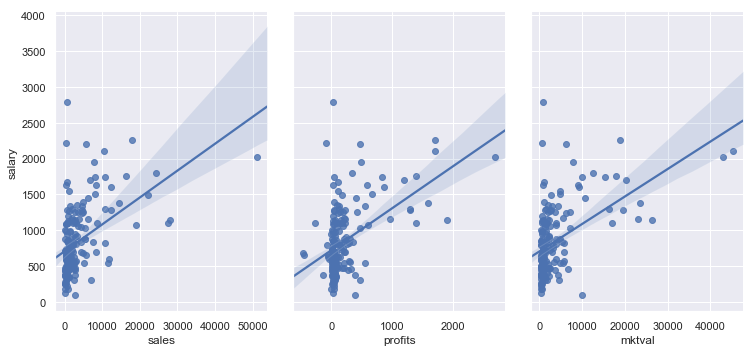

In [16]:
sns.pairplot(df_taso, x_vars = ['sales', 'profits', 'mktval'], y_vars = 'salary', 
             height = 5, aspect = 0.7, 
             kind = 'reg')
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


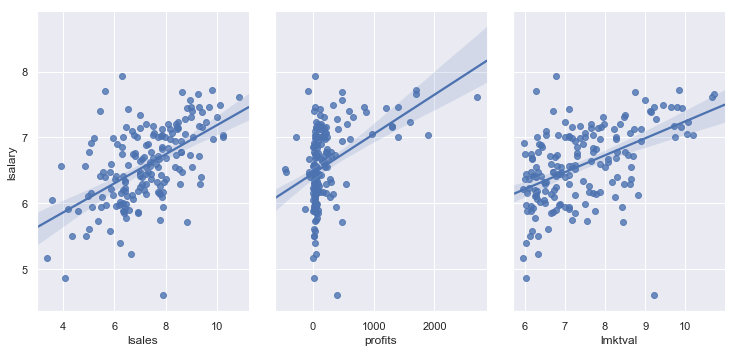

In [17]:
sns.pairplot(df_log, x_vars = ['lsales', 'profits', 'lmktval'], y_vars = 'lsalary', 
             height = 5, aspect = 0.7, 
             kind = 'reg')
plt.show()

Muistelet myös lukeneesi varoituksia multikollineariteetista ja siitä, että se saattaa vaikuttaa analyysisi luotettavuuteen. Päätät tarkastaa muuttujien väliset korrelaatiot.

In [18]:
corr = df_taso.drop(['comtensq', 'ceotensq'], axis = 1).corr()
corr

,salary,age,grad,comten,ceoten,sales,profits,mktval,profmarg
salary,1.000000,0.093506,0.052210,-0.037605,0.137190,0.472663,0.491158,0.511900,-0.030931
age,0.093506,1.000000,-0.118367,0.475791,0.336373,0.128396,0.116156,0.109139,0.015134
grad,0.052210,-0.118367,1.000000,-0.221019,-0.098988,0.075452,0.096819,0.121427,-0.015943
comten,-0.037605,0.475791,-0.221019,1.000000,0.311414,0.106862,0.146806,0.140103,0.048264
ceoten,0.137190,0.336373,-0.098988,0.311414,1.000000,-0.067069,-0.020754,0.007937,0.049206
sales,0.472663,0.128396,0.075452,0.106862,-0.067069,1.000000,0.798243,0.754619,-0.017442
profits,0.491158,0.116156,0.096819,0.146806,-0.020754,0.798243,1.000000,0.918124,0.125396
mktval,0.511900,0.109139,0.121427,0.140103,0.007937,0.754619,0.918124,1.000000,0.066888
profmarg,-0.030931,0.015134,-0.015943,0.048264,0.049206,-0.017442,0.125396,0.066888,1.000000


Ylläoleva taulukko vaikuttaa hieman sekavalta, joten havainnollistat asiaa kuvan avulla.

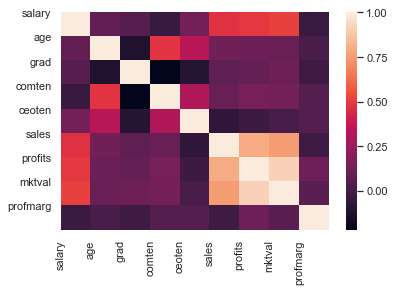

In [19]:
sns.heatmap(corr)

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

Huomaat, että yrityksen voiton ja markkina-arvon välillä on todella iso korrelaatio. Pidät tämän mielessäsi ja toistat saman logaritmisille muuttujille.

In [20]:
corr = df_log.drop(['comtensq', 'ceotensq'], axis = 1).corr()
corr

,age,grad,comten,ceoten,profits,lsalary,lsales,lmktval,profmarg
age,1.000000,-0.118367,0.475791,0.336373,0.116156,0.076234,0.192454,0.131729,0.015134
grad,-0.118367,1.000000,-0.221019,-0.098988,0.096819,0.034253,0.086143,0.150145,-0.015943
comten,0.475791,-0.221019,1.000000,0.311414,0.146806,-0.033385,0.236128,0.103368,0.048264
ceoten,0.336373,-0.098988,0.311414,1.000000,-0.020754,0.104910,-0.039313,-0.043225,0.049206
profits,0.116156,0.096819,0.146806,-0.020754,1.000000,0.413859,0.607158,0.776922,0.125396
lsalary,0.076234,0.034253,-0.033385,0.104910,0.413859,1.000000,0.539875,0.498568,-0.059606
lsales,0.192454,0.086143,0.236128,-0.039313,0.607158,0.539875,1.000000,0.736416,-0.014420
lmktval,0.131729,0.150145,0.103368,-0.043225,0.776922,0.498568,0.736416,1.000000,0.060745
profmarg,0.015134,-0.015943,0.048264,0.049206,0.125396,-0.059606,-0.014420,0.060745,1.000000


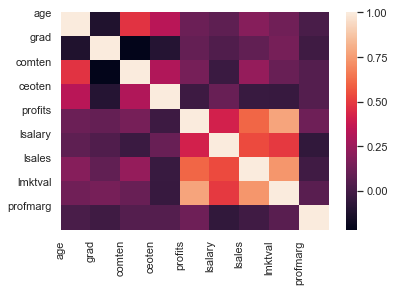

In [21]:
sns.heatmap(corr)

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

Yllätykseksesi huomaat, että tilanne on huomattavasti parempi. Päätät jatkaa analyysia ja olla tekemättä muutoksia dataan.

## Harjoitusdata ja testidata

Seuraava askeleesi on jakaa datasettisi harjoitus- ja testidataan. (Jos kaipaat muistinvirkistämistä, tästä on lisää viime kerran materiaaleissa.)

In [22]:
X = df_taso.drop(['salary'], axis = 1)
y = df_taso.salary

logX = df_log.drop(['lsalary'], axis = 1)
logy = df_log.lsalary

In [23]:
X.head()

,age,grad,comten,ceoten,sales,profits,mktval,comtensq,ceotensq,profmarg
0,49,1,9,2,6200,966,23200,81,4,15.580650
1,43,1,10,10,283,48,1100,100,100,16.961130
2,51,1,9,3,169,40,1100,81,9,23.668640
3,55,0,22,22,1100,-54,1000,484,484,-4.909091
4,44,1,8,6,351,28,387,64,36,7.977208


In [24]:
type(X)

pandas.core.frame.DataFrame

In [25]:
X.shape

(176, 10)

In [26]:
y.head()

0    1161
1     600
2     379
3     651
4     497
Name: salary, dtype: int64

In [27]:
type(y)

pandas.core.series.Series

In [28]:
y.shape

(176,)

Käytetään tällä kertaa `sklearn.model_selection`-moduulin valmista funktiota datan jakamiseen.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [31]:
logX_train, logX_test, logy_train, logy_test = train_test_split(logX, logy, random_state = 42)

In [32]:
X_train.shape

(132, 10)

In [33]:
X_test.shape

(44, 10)

## Lineaarinen regressio

Valitset mallin sovittamiseen `sklearn.linear_model`-moduulin lineaarisen regression funktion. Luot oman funktion taso- ja log-malleille.

In [34]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
llinreg = LinearRegression()

In [35]:
# sovitetaan regressio harjoitusdataan
linreg.fit(X_train, y_train)
llinreg.fit(logX_train, logy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Seuraavaksi tarkastelet tarkemmin mallin kertoimia saadaksesi käsityksen siitä, miten johtajan palkka määräytyy mallissasi.

In [36]:
# tulostetaan regressiovakion arvo
linreg.intercept_

220.2136987996373

In [37]:
llinreg.intercept_

4.183109984544585

In [38]:
# kerätään muuttujien nimet vektoreihin ja tehdään näistä lista
coef_names = ['age', 'grad', 'comten', 'ceoten', 'sales', 'profits', 
              'mktval', 'comtensq', 'ceotensq', 'profmarg']
l_coef_names = ['age', 'grad', 'comten', 'ceoten', 'lsales', 'profits', 
              'lmktval', 'comtensq', 'ceotensq', 'profmarg']

coefs = zip(coef_names, linreg.coef_)
lcoefs = zip(l_coef_names, llinreg.coef_)

coefs = list(coefs)
print(coefs)
print("")
lcoefs = list(lcoefs)
print(lcoefs)

[('age', 6.399752836474609), ('grad', -48.250285264265514), ('comten', 5.963189854211676), ('ceoten', 47.01512366190105), ('sales', 0.0075631522630478475), ('profits', 0.2014484652167957), ('mktval', 0.022479460466437336), ('comtensq', -0.340481855141601), ('ceotensq', -1.1743817788953776), ('profmarg', -1.7719171160206877)]

[('age', 0.0023935003369461886), ('grad', -0.07740034159291824), ('comten', 0.001011968332119664), ('ceoten', 0.04655759585997374), ('lsales', 4.738812609085091e-05), ('profits', 0.14849523834181788), ('lmktval', 0.1539703370607295), ('comtensq', -0.0002750235953702351), ('ceotensq', -0.0009124357641041714), ('profmarg', -0.002190139605817343)]


Tilanteen havainnollistamiseksi kuvan piirtäminen on jälleen hyvä idea.

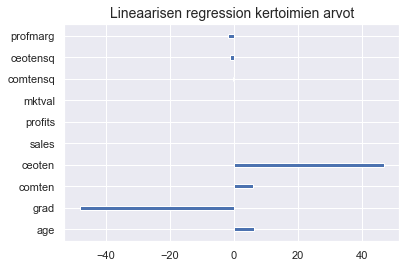

In [39]:
plt.barh(y = X.columns, width = linreg.coef_, height = 0.2)
plt.title("Lineaarisen regression kertoimien arvot", fontsize = 14)

plt.show()

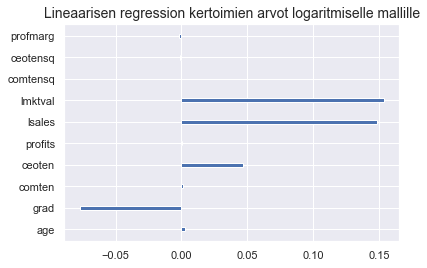

In [40]:
plt.barh(y = logX.columns, width = llinreg.coef_, height = 0.2)
plt.title("Lineaarisen regression kertoimien arvot logaritmiselle mallille", fontsize = 14)

plt.show()

Hieman ihmettelet muuttujan grad negatiivista arvoa, mutta muistat, että myös collegen käyneiden yritysjohtajien palkka oli pienempi kun käymättömien. Alat epäillä, että kouluttautuneiden on helpompi päästä yritysjohtajiksi. Myynnin ja yrityksen markkina-arvon vaikutus näyttää kadonneen tasomallista, kun taas log-mallissa on havaittavissa selkeä vaikutus. Epäilet, että tämä johtuu muuttujien välisestä multikollineariteetista.

Kokeilet mallilla ennustamista parilla esimerkillä. Logaritmisen mallin palkasta on otettava eksponentiaali jotta saadaan palkan taso.

In [41]:
linreg.predict(X_test[0:3])

array([441.53704015, 547.14013921, 574.09782961])

In [42]:
X_test[0:3]

,age,grad,comten,ceoten,sales,profits,mktval,comtensq,ceotensq,profmarg
19,58,0,36,1,1100,69,880,1296,1,6.272727
45,64,0,44,8,571,57,670,1936,64,9.982487
140,40,0,18,1,2400,60,1300,324,1,2.500000


In [43]:
y_test[0:3]

19     609
45     401
140    310
Name: salary, dtype: int64

In [44]:
import numpy as np

In [45]:
np.exp(llinreg.predict(logX_test[0:3]))

array([455.29197106, 440.43486507, 672.31593934])

Olet hieman huolissasi mallisi suorituskyvystä ja päätät laskea mallin selitysasteen ($ R^2 $) testidatasi avulla eli tarkastaa, kuinka monta prosenttia mallisi selittää yritysjohtajan palkasta.

In [46]:
linreg.score(X_test, y_test)

0.1665283727242004

In [47]:
llinreg.score(logX_test, logy_test)

0.10607108847310853

Et ole kovin tyytyväinen tulokseen, mutta ennustat vielä mallisi avulla testidatasi ja havainnollistat mallin tuloksia kuvien avulla.

In [48]:
pred = linreg.predict(X_test)
lpred = llinreg.predict(logX_test)

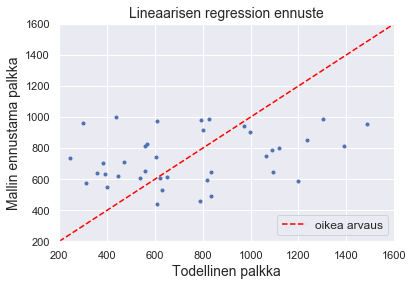

In [49]:
plt.plot(y_test, pred, '.')
plt.plot([200, 1600], [200, 1600], linestyle='--', color = 'red', label = "oikea arvaus")
plt.xlim([200, 1600]), plt.ylim([200, 1600])

plt.title("Lineaarisen regression ennuste", fontsize = 14)
plt.xlabel('Todellinen palkka', fontsize = 14)
plt.ylabel('Mallin ennustama palkka', fontsize = 14)
plt.legend(loc = 4, fontsize = 12)

plt.show()

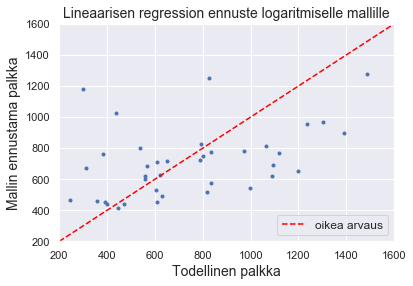

In [50]:
plt.plot(y_test, np.exp(lpred), '.')
plt.plot([200, 1600], [200, 1600], linestyle='--', color = 'red', label = "oikea arvaus")
plt.xlim([200, 1600]), plt.ylim([200, 1600])

plt.title("Lineaarisen regression ennuste logaritmiselle mallille", fontsize = 14)
plt.xlabel('Todellinen palkka', fontsize = 14)
plt.ylabel('Mallin ennustama palkka', fontsize = 14)
plt.legend(loc = 4, fontsize = 12)

plt.show()

## Säännelty regressio

Olet nyt erittäin huolissasi mallistasi, mutta päätät vielä kokeilla, auttaisiko mallin säännöstely asiaa. Aloitat lassolla.

In [51]:
from sklearn.linear_model import Lasso
lasso = Lasso()
llasso = Lasso()

In [52]:
lasso.fit(X_train, y_train)
llasso.fit(logX_train, logy_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Jälleen tarkastat mallin kertoimet.

In [53]:
lasso.intercept_

218.80039574105297

In [54]:
llasso.intercept_

6.509699511486989

In [55]:
coefs = zip(coef_names, lasso.coef_)
lcoefs = zip(coef_names, llasso.coef_)

coefs = list(coefs)
lcoefs = list(lcoefs)

print(coefs)
print("")
print(lcoefs)

[('age', 6.390229703497373), ('grad', -43.90801086688294), ('comten', 5.897803548209496), ('ceoten', 46.882976677209726), ('sales', 0.007595655454173405), ('profits', 0.20102540288953658), ('mktval', 0.022444026622450302), ('comtensq', -0.338287507139723), ('ceotensq', -1.1684953767623079), ('profmarg', -1.7656584523098515)]

[('age', 0.0), ('grad', -0.0), ('comten', 0.0), ('ceoten', 0.0), ('sales', 0.0006302714323634822), ('profits', 0.0), ('mktval', 0.0), ('comtensq', -0.00018538564891745426), ('ceotensq', 0.0006304797687097125), ('profmarg', -2.7757959198412285e-06)]


Huomaat, että useiden muuttujien arvot ovat kadonneet kokonaan ja muistat, että lasso nimenomaan yksinkertaistaa mallia rankaisemalla liian monen selittävän tekijän käytöstä. Piirrät vielä asiaa havainnollistavan kuvan.

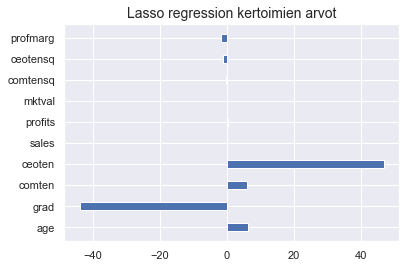

In [56]:
plt.barh(y = X.columns, width = lasso.coef_, height = 0.4)
plt.title("Lasso regression kertoimien arvot", fontsize = 14)

plt.show()

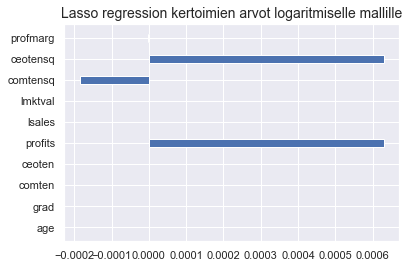

In [57]:
plt.barh(y = logX.columns, width = llasso.coef_, height = 0.4)
plt.title("Lasso regression kertoimien arvot logaritmiselle mallille", fontsize = 14)

plt.show()

Katsotaan vielä mallin selitysaste ja piirretään kuva mallin ennustamista ja todellisista palkoista.

In [58]:
pred = lasso.predict(X_test)
lpred = llasso.predict(logX_test)

In [59]:
lasso.score(X_test, y_test)

0.16733883201864452

In [60]:
llasso.score(logX_test, logy_test)

-0.029804589118289645

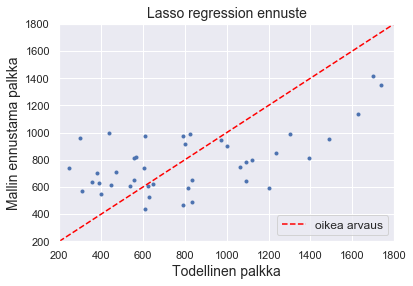

In [61]:
plt.plot(y_test, pred, '.')
plt.plot([200, 1800], [200, 1800], linestyle='--', color = 'red', label = "oikea arvaus")
plt.xlim([200, 1800]), plt.ylim([200, 1800])

plt.title("Lasso regression ennuste", fontsize = 14)
plt.xlabel('Todellinen palkka', fontsize = 14)
plt.ylabel('Mallin ennustama palkka', fontsize = 14)
plt.legend(loc = 4, fontsize = 12)

plt.show()

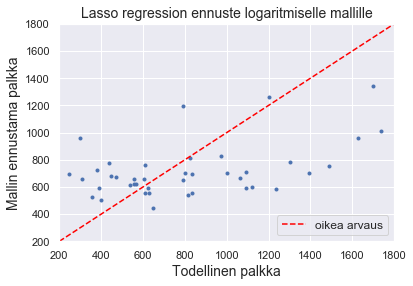

In [62]:
plt.plot(y_test, np.exp(lpred), '.')
plt.plot([200, 1800], [200, 1800], linestyle='--', color = 'red', label = "oikea arvaus")
plt.xlim([200, 1800]), plt.ylim([200, 1800])

plt.title("Lasso regression ennuste logaritmiselle mallille", fontsize = 14)
plt.xlabel('Todellinen palkka', fontsize = 14)
plt.ylabel('Mallin ennustama palkka', fontsize = 14)
plt.legend(loc = 4, fontsize = 12)

plt.show()

Olosi alkaa olla jo vähemmän rohkaistunut, muttä päätät vielä antaa harjanneregressiolle mahdollisuuden.

In [63]:
from sklearn.linear_model import Ridge
ridge = Ridge()
lridge = Ridge()

In [64]:
ridge.fit(X_train, y_train)
lridge.fit(logX_train, logy_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
ridge.intercept_

219.10338928722388

In [66]:
lridge.intercept_

4.196264871802

In [67]:
coefs = zip(coef_names, ridge.coef_)
lcoefs = zip(coef_names, lridge.coef_)

coefs = list(coefs)
lcoefs = list(lcoefs)

print(coefs)
print("")
print(lcoefs)

[('age', 6.403638235367416), ('grad', -46.710008966603624), ('comten', 5.972193235195459), ('ceoten', 46.95891970660021), ('sales', 0.007568796574042356), ('profits', 0.20134061522651486), ('mktval', 0.022468088436140076), ('comtensq', -0.34042039169897104), ('ceotensq', -1.1719976519940782), ('profmarg', -1.7708730752643915)]

[('age', 0.002440463603831835), ('grad', -0.07488148057408964), ('comten', 0.001084932392639019), ('ceoten', 0.04655086761818114), ('sales', 5.2250462751675984e-05), ('profits', 0.14819745490073713), ('mktval', 0.15171500699209453), ('comtensq', -0.00027641594462789003), ('ceotensq', -0.0009130799162097824), ('profmarg', -0.0021948883327415586)]


Huomaat, että toisin kuin lasson tapauksessa, selittävien tekijöiden vaikutus tulee taas näkyviin, myös logaritmisessa mallissa.

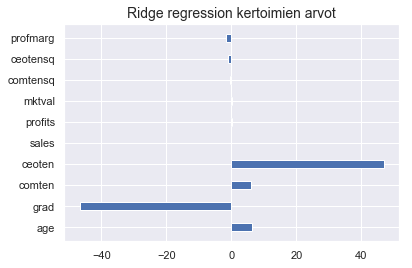

In [68]:
plt.barh(y = X.columns, width = ridge.coef_, height = 0.4)
plt.title("Ridge regression kertoimien arvot", fontsize = 14)

plt.show()

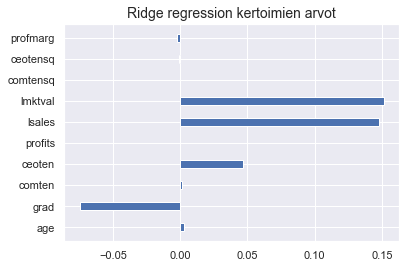

In [69]:
plt.barh(y = logX.columns, width = lridge.coef_, height = 0.4)
plt.title("Ridge regression kertoimien arvot", fontsize = 14)

plt.show()

Tuloksesi muistuttavat taas hieman lähemmin lineaarisen regression tuloksia. Hieman jännittyneenä tulostat mallin selitysasteet.

In [70]:
ridge.score(X_test, y_test)

0.16678403503619044

In [71]:
lridge.score(logX_test, logy_test)

0.1068960647955789

Harjanneregressio tuntuu pärjäävän ainakin lassoa paremmin. Sekin selittää kuitenkin parhaimmillaankin vain noin 17 % treenijoukossa olevien yritysjohtajien palkasta. Piirrät vielä kuvan.

In [72]:
pred = ridge.predict(X_test)
lpred = lridge.predict(logX_test)

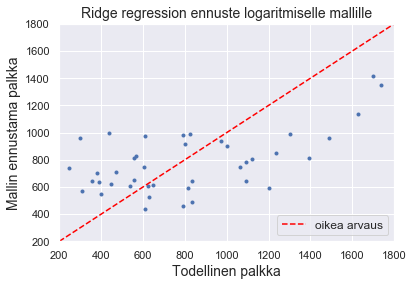

In [73]:
plt.plot(y_test, pred, '.')
plt.plot([200, 1800], [200, 1800], linestyle='--', color = 'red', label = "oikea arvaus")
plt.xlim([200, 1800]), plt.ylim([200, 1800])

plt.title("Ridge regression ennuste logaritmiselle mallille", fontsize = 14)
plt.xlabel('Todellinen palkka', fontsize = 14)
plt.ylabel('Mallin ennustama palkka', fontsize = 14)
plt.legend(loc = 4, fontsize = 12)

plt.show()

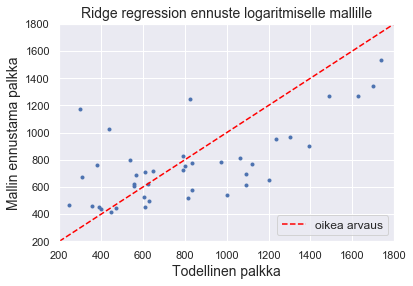

In [74]:
plt.plot(y_test, np.exp(lpred), '.')
plt.plot([200, 1800], [200, 1800], linestyle='--', color = 'red', label = "oikea arvaus")
plt.xlim([200, 1800]), plt.ylim([200, 1800])

plt.title("Ridge regression ennuste logaritmiselle mallille", fontsize = 14)
plt.xlabel('Todellinen palkka', fontsize = 14)
plt.ylabel('Mallin ennustama palkka', fontsize = 14)
plt.legend(loc = 4, fontsize = 12)

plt.show()

Et ole kovinkaan toiveikas mallisi ennustevoiman suhteen. Haluat kuitenkin ottaa matkasi oppimiskokemuksena ja haluat ymmärtää paremmin regression sääntelyn vaikutusta. Piirrät mallien kertoimet samaan kuvaan horisontaaliseen pylväsdiagrammiin.

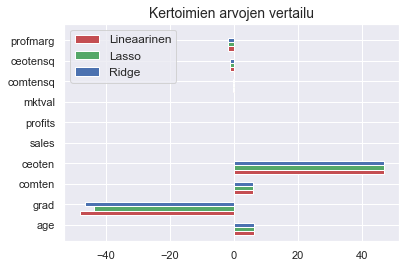

In [75]:
# luodaan oma indeksi mallin jokaiselle kertoimelle
ind = np.arange(len(X.columns))

# käytetään matplotlib-kirjaston subplot-funktiota
fig, ax = plt.subplots()

# tehdään jokaisen mallin kertoimille oma pylväs ja väritetään nämä omilla väreillään
ax.barh(y = ind - 0.2, width = linreg.coef_, height = 0.2, 
         label = "Lineaarinen", color = 'r')
ax.barh(y = ind, width = lasso.coef_, height = 0.2, 
         label = "Lasso", color = 'g')
ax.barh(y = ind + 0.2, width = ridge.coef_, height = 0.2, 
         label = "Ridge", color = 'b')

# tulostetaan mallien nimet ja vaihdetaan indeksien tilalle muuttujien nimet
ax.legend(loc = 2, fontsize = 12)
ax.set(yticks = ind + 0.2, yticklabels = coef_names, ylim = [0.4 - 1, len(X.columns)])
ax.set_title("Kertoimien arvojen vertailu", fontsize = 14)

plt.show()

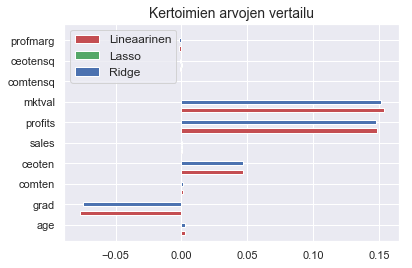

In [76]:
fig, ax = plt.subplots()

ax.barh(y = ind - 0.2, width = llinreg.coef_, height = 0.2, 
         label = "Lineaarinen", color = 'r')
ax.barh(y = ind, width = llasso.coef_, height = 0.2, 
         label = "Lasso", color = 'g')

ax.barh(y = ind + 0.2, width = lridge.coef_, height = 0.2, 
         label = "Ridge", color = 'b')

ax.legend(loc = 2, fontsize = 12)
ax.set_title("Kertoimien arvojen vertailu", fontsize = 14)
ax.set(yticks = ind + 0.2, yticklabels = coef_names, ylim = [0.4 - 1, len(logX.columns)])

plt.show()

Huomaat, että sääntely hieman häivyttää grad-muuttujan arvoa ja siten yksinkertaistaa hieman malleja. Logistisessa mallissa lasso tuntuu häivyttäneen kertoimien arvon kokonaan, mikä tuntuu mielestäsi melkoiselta ylisäätelyltä.

## Ristiinvalidointi ja mallien vertailu

Haluat vielä saada euromääräisen arvion taso-mallisi mittavirheelle. Tätä varten lasket mallillesi neliösummaisen mittavirheen (*engl. mean squared error*). Kun tästä tunnusluvusta ottaa neliöjuuren, saa euromääräisen arvion mallin mittavirheelle.

Päätät myös tutustua mallisi avulla löytämääsi ristiinvalidoinnin käsitteeseen ja vertailla malleja keskenään. Ristiinvalidointi varmistaa, että tuloksesi ei riipu jaostasi harjoitus- ja testidataan. Siinä jako suoritetaan useita kertoja ja jokaiselle kerralle lasketaan mallin mittavirhe. Näin varmistat, että saat luotettavan arvio mallisi mittavirheestä.

In [77]:
from sklearn.model_selection import cross_validate

In [78]:
# tehdään 10 jakoa ja lasketaan jokaiselle mittavirhe
# tulostetaan myös harjoitusjoukon mittavirhe. tämä on pienempi kuin testijoukon mittavirhe
cv_tulokset = cross_validate(linreg, X, y, cv = 10, scoring = 'neg_mean_squared_error',
                            return_train_score = True) 
l_cv_tulokset = cross_validate(llinreg, logX, logy, cv = 10, scoring = 'neg_mean_squared_error',
                            return_train_score = True) 

In [79]:
# katsotaan, mitä tuloksista saa irti
sorted(cv_tulokset.keys())

['fit_time', 'score_time', 'test_score', 'train_score']

In [80]:
# haetaan mallin antama harjoitusjoukkojen mittavirheet
cv_tulokset['test_score']

array([-153026.13614377, -110407.3034373 , -232558.70111822,
       -146376.06503577, -429532.11077988,  -85134.61473731,
       -170797.56970554, -108400.32957821, -101579.73328116,
       -593864.03571381])

In [81]:
l_cv_tulokset['test_score']

array([-0.22472328, -0.20672226, -0.17439947, -0.1132567 , -0.3115329 ,
       -0.077125  , -0.57018558, -0.1788518 , -0.17820315, -0.91152702])

In [82]:
# lasketaan keskiarvo. vaihdetaan samalla merkkiä, jotta voidaan ottaa neliöjuuri
mse_linreg = - cv_tulokset['test_score'].mean()
mse_linreg

213167.65995309656

In [83]:
l_mse_linreg = - l_cv_tulokset['test_score'].mean()
l_mse_linreg

0.29465271497598833

In [84]:
rmse_linreg = np.sqrt(mse_linreg)
rmse_linreg

461.7008338232633

In [85]:
l_rmse_linreg = np.sqrt(l_mse_linreg)
l_rmse_linreg

0.5428192286350847

Mittavirheet eivät enää ole keskenään vertailukelpoisia. Huomataan, että tasomallin mittavirhe on melko suuri. Verrataan tätä vielä lopuksi yritysjohtajan keskipalkkaan, jotta saadaan selvä käsitys suuruusluokasta.

In [86]:
y.mean()

840.6761363636364

Toistetaan sama analyysi lassolle ja harjanneregressiolle. Vaihtelu virkistää, joten kokeilkaamme toista funktiota. Tämä tulostaa ainoastaan pyydetyt arvot testidatalle.

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
scores = cross_val_score(lasso, X, y, cv = 10, scoring = 'neg_mean_squared_error')
lscores = cross_val_score(llasso, logX, logy, cv = 10, scoring = 'neg_mean_squared_error')

rmse_lasso = np.sqrt(- scores.mean())
l_rmse_lasso = np.sqrt(- lscores.mean())

scores = cross_val_score(ridge, X, y, cv = 10, scoring = 'neg_mean_squared_error')
lscores = cross_val_score(lridge, logX, logy, cv = 10, scoring = 'neg_mean_squared_error')

rmse_ridge = np.sqrt(- scores.mean())
l_rmse_ridge = np.sqrt(- lscores.mean())

In [89]:
rmse_lasso

461.8945848042337

In [90]:
l_rmse_lasso

0.5676465567560017

In [91]:
rmse_ridge

461.66544606907047

In [92]:
l_rmse_ridge

0.5430121834217534

Säänneltyjen regressiomallien antama euromäärinen mittavirhe on samaa suuruusluokkaa tasomallille. Piirretän vielä asiaa havainnollistavat kuvat.

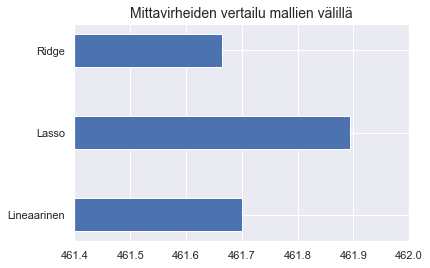

In [93]:
plt.barh(y = ['Lineaarinen', 'Lasso', 'Ridge'], 
         width = [rmse_linreg, rmse_lasso, rmse_ridge], 
         height = 0.4)

plt.xlim([461.4, 462])
plt.title("Mittavirheiden vertailu mallien välillä", fontsize = 14)

plt.show()

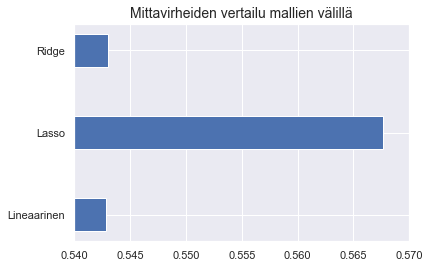

In [94]:
plt.barh(y = ['Lineaarinen', 'Lasso', 'Ridge'], 
         width = [l_rmse_linreg, l_rmse_lasso, l_rmse_ridge], 
         height = 0.4)

plt.xlim([0.54, 0.57])
plt.title("Mittavirheiden vertailu mallien välillä", fontsize = 14)

plt.show()

Lopulta päätät, että et missään tapauksessa voi käyttää malliasi arvioimaan potentiaalisten asiakkaittesi palkkaa nykytyössään. Huomaat kuitenkin, että analyysisi antaa tärkeää tietoa siitä, mitkä tekijät vaikuttavat yritysjohtajien palkkaan. Toivot, että tämä auttaisi sinua tulevaisuudessa löytämään paremmin kovapalkkaiset kandidaatit. Pohdit myös, pystyisikö mallisi rankkaamaan yritysjohtajat oikein palkan mukaan. Päätät palata vielä joskus asiaan paremmalla ajalla.

# Lisämateriaalia: muuttujien skaalaaminen

Mallin selitysvoimaa voi parantaa skaalaamalla muuttujien arvoja yhtenäisempään mittakaavaan. Skaalaaminen on erityisen tärkeää silloin, kun muuttujien skaalat ovat kaukana toisistaan. Tässä mallissa skaalaaminen ei juurikaan vaikuta tuloksiin. Skaalaamisen vaikutuksiin voi tutustua allaolevan koodin avulla.

In [95]:
from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()
scaler_y=StandardScaler()

X_scaled=scaler_x.fit_transform(X)
y_scaled=scaler_y.fit_transform(np.array(y).reshape(-1,1))

print(y_scaled.shape)
print(np.mean(X_scaled, axis=0))
print(np.mean(y_scaled, axis=0),np.std(y_scaled, axis=0))

(176, 1)
[ 3.93624527e-16  8.07434927e-17  1.00929366e-16  3.02788098e-17
 -3.02788098e-17 -2.01858732e-17  1.00929366e-17 -7.31737903e-17
  2.01858732e-17  0.00000000e+00]
[-2.01858732e-17] [1.]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state = 42)

In [97]:
linreg_scale = LinearRegression()

In [98]:
linreg_scale.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
linreg_scale.score(X_test, y_test)

0.16652837272427357

In [100]:
scaler_x=StandardScaler()
scaler_y=StandardScaler()

X_scaled=scaler_x.fit_transform(logX)
y_scaled=scaler_y.fit_transform(np.array(logy).reshape(-1,1))


print(y_scaled.shape)
print(np.mean(X_scaled, axis=0))
print(np.mean(y_scaled, axis=0),np.std(y_scaled, axis=0))

(176, 1)
[ 3.93624527e-16  8.07434927e-17  1.00929366e-16  3.02788098e-17
 -2.01858732e-17 -2.57369883e-16  2.32137542e-16 -7.31737903e-17
  2.01858732e-17  0.00000000e+00]
[1.56440517e-16] [1.]


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state = 42)

In [102]:
linreg_scale = LinearRegression()
linreg_scale.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
linreg_scale.score(X_test, y_test)

0.10607108847310631

# Lisätehtäviä

1. Toista analyysi varioimalla käytettyjä muuttujia. Erityisesti toista tasomalli niin, että valitset vain toisen korreloituneista muuttujista.
2. Toista analyysi siten, että mukana on johtaja, jolla on poikkeuksellisen korkea palkka. Logistisen mallin pitisi nyt selittää palkkaa jonkin verran paremmin, kun taas lineaarisen mallin selitysvoiman tulisi vähetä.